In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("updated_data.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,NaN,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# Fill missing values in 'smoking_history' with 'unknown'
df['smoking_history'].fillna('unknown', inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_17780\1541389459.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoking_history'].fillna('unknown', inplace=True)


In [5]:
# Apply a moving average on 'bmi' with a window size of 3
df['bmi_smooth'] = df['bmi'].rolling(window=3).mean()

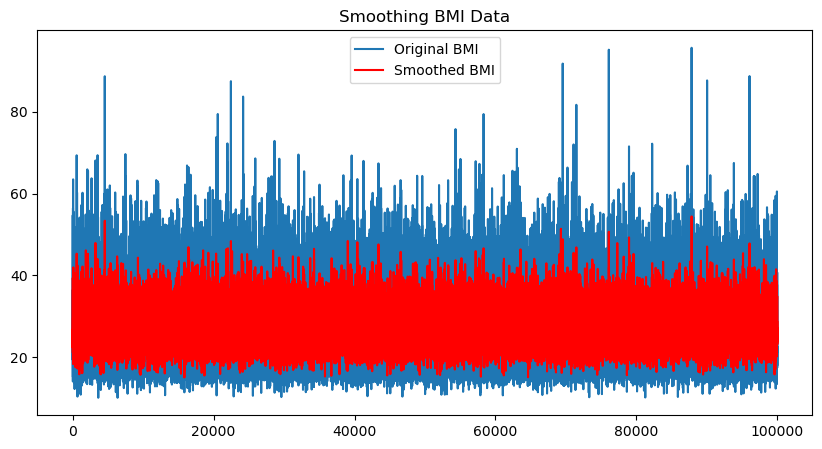

In [6]:
# You can visualize the smoothed data using matplotlib
plt.figure(figsize=(10, 5))
plt.plot(df['bmi'], label='Original BMI')
plt.plot(df['bmi_smooth'], label='Smoothed BMI', color='red')
plt.legend()
plt.title('Smoothing BMI Data')
plt.show()

In [7]:
# Detecting outliers in 'bmi' using IQR
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

In [8]:
# Filtering out the outliers
df_no_outliers = df[~((df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR)))]


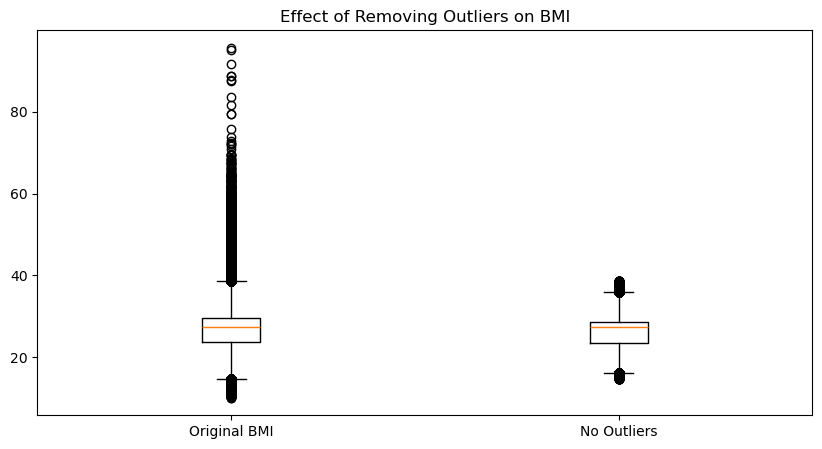

In [9]:
# Plot to see the effect of removing outliers
plt.figure(figsize=(10, 5))
plt.boxplot([df['bmi'], df_no_outliers['bmi']], labels=['Original BMI', 'No Outliers'])
plt.title('Effect of Removing Outliers on BMI')
plt.show()

In [10]:
# Standardize 'gender' column to title case (e.g., 'Male', 'Female')
df['gender'] = df['gender'].str.title()


In [11]:
# Min-Max Normalization function
def min_max_normalize(column):
    return (column - column.min()) / (column.max() - column.min())

In [12]:

# Apply normalization to numeric columns
df['age_normalized'] = min_max_normalize(df['age'])
df['bmi_normalized'] = min_max_normalize(df['bmi'])
df['HbA1c_normalized'] = min_max_normalize(df['HbA1c_level'])

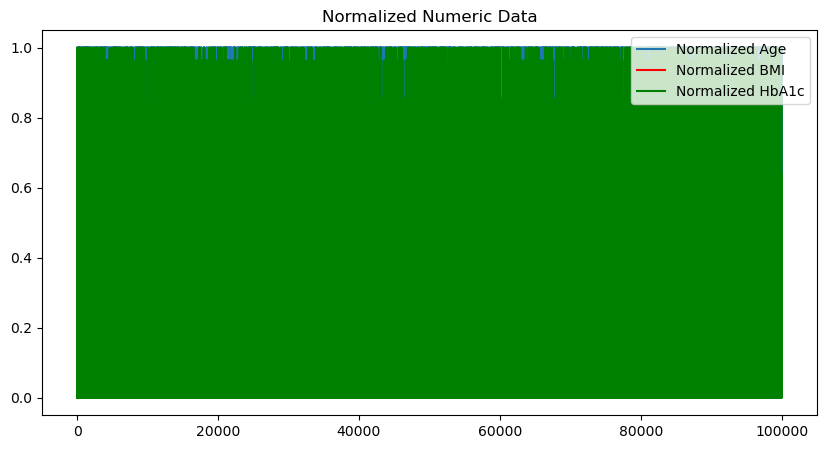

In [13]:
# You can visualize normalized columns
plt.figure(figsize=(10, 5))
plt.plot(df['age_normalized'], label='Normalized Age')
plt.plot(df['bmi_normalized'], label='Normalized BMI', color='red')
plt.plot(df['HbA1c_normalized'], label='Normalized HbA1c', color='green')
plt.legend()
plt.title('Normalized Numeric Data')
plt.show()

In [14]:
# Define bins for age groups and assign labels
bins = [0, 18, 35, 60, 100]
labels = ['Child', 'Youth', 'Adult', 'Senior']

In [15]:
# Discretize 'age' into categories
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [16]:
# Display the first few rows to verify the changes
print(df[['age', 'age_group']].head())

    age age_group
0  80.0    Senior
1  54.0     Adult
2  28.0     Youth
3  36.0     Adult
4  76.0    Senior


In [17]:
# Define BMI categories according to the WHO BMI classification
bmi_bins = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

In [18]:
# Create a BMI category based on the ranges
df['bmi_category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels)


In [19]:
# Display the first few rows to verify the changes
print(df[['bmi', 'bmi_category']].head())


     bmi bmi_category
0  25.19   Overweight
1  27.32   Overweight
2  27.32   Overweight
3  23.45       Normal
4  20.14       Normal


In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [21]:
# Standardizing the numeric features before applying PCA
numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df_numeric = df[numeric_features]

In [22]:
# Standardize the features
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_numeric)

In [23]:

# Apply PCA to reduce the number of features
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_result = pca.fit_transform(df_standardized)

In [24]:
# Add PCA results to the original dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

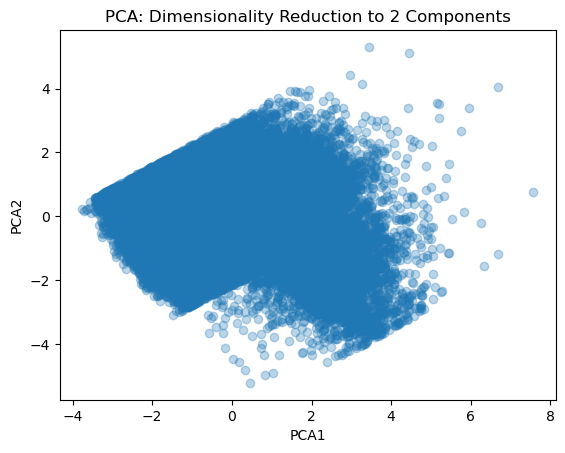

In [25]:
# Visualize the PCA result
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.3)
plt.title('PCA: Dimensionality Reduction to 2 Components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [26]:

# Check how much variance is explained by each component
print("Explained variance by each component: ", pca.explained_variance_ratio_)

Explained variance by each component:  [0.36585896 0.2604204 ]


In [27]:
# Select only numeric columns for aggregation
numeric_columns = df.select_dtypes(include=['number']).columns

# Aggregate by 'age_group' and 'bmi_category', and calculate the mean of only numeric columns
aggregated_data = df.groupby(['age_group', 'bmi_category'])[numeric_columns].mean()

# Display the aggregated result
print(aggregated_data)


                              age  hypertension  heart_disease        bmi  \
age_group bmi_category                                                      
Child     Underweight    5.762025      0.000133       0.000265  16.212614   
          Normal        11.001894      0.000190       0.000190  21.109186   
          Overweight    10.900229      0.001061       0.000424  27.237870   
          Obese         14.439228      0.003405       0.000000  35.351532   
Youth     Underweight   25.283422      0.005348       0.002674  17.483048   
          Normal        25.959042      0.003964       0.000495  22.130350   
          Overweight    27.183573      0.008838       0.000865  27.251387   
          Obese         28.152453      0.036429       0.001474  36.327220   
Adult     Underweight   47.518644      0.030508       0.023729  17.132847   
          Normal        47.491334      0.042296       0.017332  22.497637   
          Overweight    48.160470      0.062706       0.023466  27.353882   

C:\Users\ACER\AppData\Local\Temp\ipykernel_17780\1096557005.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = df.groupby(['age_group', 'bmi_category'])[numeric_columns].mean()


In [28]:
# Random sampling of 10% of the data
sampled_df = df.sample(frac=0.1, random_state=42)

# Display the shape of the sampled data
print(f'Shape of original data: {df.shape}')
print(f'Shape of sampled data: {sampled_df.shape}')


Shape of original data: (100000, 17)
Shape of sampled data: (10000, 17)


In [29]:
# Convert categorical variables like 'gender' into numerical form using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history', 'age_group', 'bmi_category'])

# Display the encoded data
print(df_encoded.head())


    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  bmi_smooth  age_normalized  bmi_normalized  ...  \
0         0         NaN        1.000000        0.177171  ...   
1         0         NaN        0.674675        0.202031  ...   
2         0   26.610000        0.349349        0.202031  ...   
3         0   26.030000        0.449449        0.156863  ...   
4         0   23.636667        0.949950        0.118231  ...   

   smoking_history_not current  smoking_history_unknown  age_group_Child  \
0                        False                    Fa

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset (assuming 'df' is the dataset you loaded earlier)
# Ensure 'diabetes' is the target variable (replace 'diabetes' with your actual column name if different)
df['smoking_history'].fillna('unknown', inplace=True)  # Handle missing values

# Select relevant features and the target
X = df.drop(columns=['diabetes'])  # Features (drop the target variable)
y = df['diabetes']  # Target (the column to predict)

# Convert categorical columns to numeric using one-hot encoding (if there are categorical columns like 'gender')
X = pd.get_dummies(X, drop_first=True)


C:\Users\ACER\AppData\Local\Temp\ipykernel_17780\3330399744.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoking_history'].fillna('unknown', inplace=True)  # Handle missing values


In [37]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [39]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)


In [40]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy of the Random Forest model: {accuracy * 100:.2f}%")


Accuracy of the Random Forest model: 97.17%


In [41]:
# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.97      0.69      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.97      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

